In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import control

%matplotlib notebook

# Resposta em Frequência em Sistemas LTI de Tempo Discreto


A resposta em frequência é a resposta em regime estacionário de um sistema submetido a um sinal de entrada senoidal. 

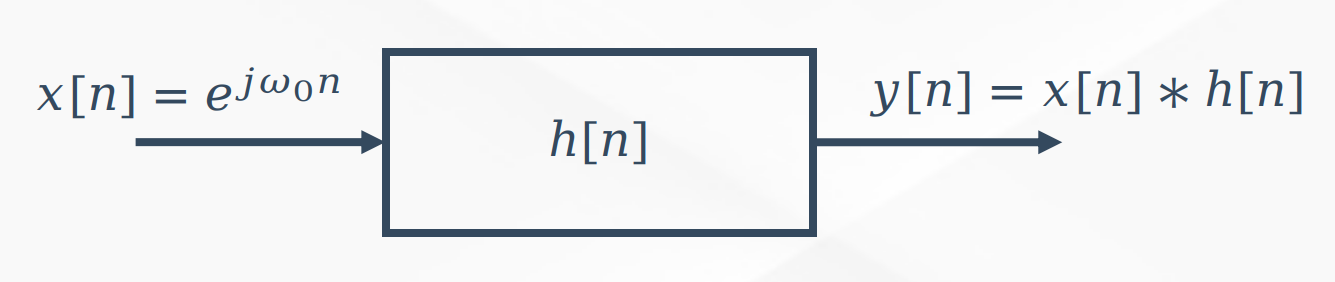




Nos sistemas LTI, o sinal de saída $y[n]$ em regime permanente é também um sinal senoidal que se distingue do sinal de entrada pelos seus valores de amplitude e fase.

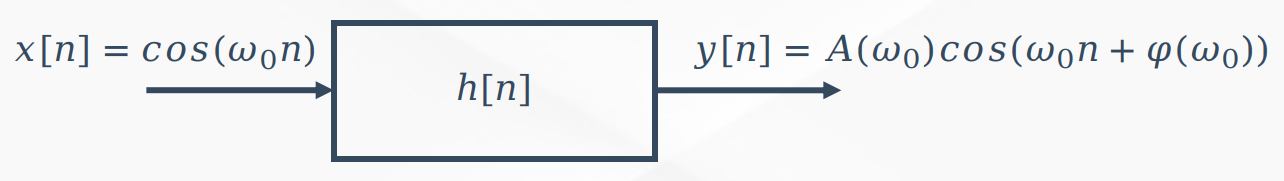

Ou seja, a resposta em frequência é caracterizada pela variação da amplitude e fase do sinal de saída $y[n]$ quando se varia a frequência do sinal de entrada $x[n]$.

Para encontrar a resposta em frequência, varia-se a frequência do sinal de entrada ao longo de uma faixa de interesse e estuda-se a resposta resultante. 

Assim como vimos no tempo contínuo, a resposta em frequência de sistemas de tempo discreto nos diz como que componentes de determinada frequência são atenuadas ou amplificadas, o que impacta diretamente no sinal de saída. 

Esse comportamento determina as características de filtragem do sistema.

Embora qualquer sistema possa ser percebido como um filtro com determinadas características, nem todo sistema é projetado para *atuar* como filtro.

Aqui, nos interessa entender como encontrar e analisar a resposta em frequência de um sistema de tempo discreto.

**Exemplo:**

Dado o sistema LTI representado pela seguinte equação de diferenças, vamos determinar a resposta do sistema.

$y[n+1]-0,8y[n]=x[n+1]$

Vamos aplicar um sinal de entrada senoidal com período variável.

$x[n]=cos(\frac{2\pi}{T}n-0,2)$

Aqui, vamos considerar que o sistema está inicialmente relaxado.

In [10]:
# Cria animação
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['figure.figsize'] = (5,3)
plt.ioff()
fig, ax = plt.subplots()

n = [i for i in range(0,61)]
T = [i for i in range(1,30)]
def animate(T):
    plt.cla()
    
    x = np.cos(2*np.pi*np.array(n)/T - 0.2)
    y = signal.lfilter([1], [1, -0.8], x, zi=None)
    
    plt.stem(n,x,'b',markerfmt='bo',label='x[n]',basefmt=" "); plt.xlabel('n'); plt.text(T/20,-3.5,'T = {}'.format(T),backgroundcolor='w')
    plt.stem(n,y,'g--',markerfmt='go',label='y[n]',basefmt=" "); sns.despine(); plt.legend(); plt.xlim(0,2*T); plt.ylim(-4,4); plt.tight_layout()

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=T)

<IPython.core.display.Javascript object>


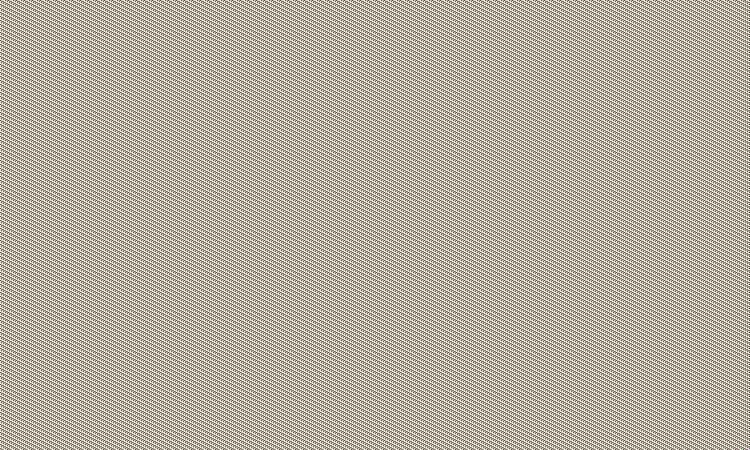

In [12]:
%matplotlib notebook
# Plot animation
ani

Mas como podemos determinar a resposta em frequência de um sistema sem ter que determinar a resposta total $y[n]$? 

Em sistemas LTI de tempo discreto estáveis, onde a circunferência unitária está dentro da ROC da função de transferência, podemos fazer a troca de variável $z=e^{j\Omega}$ em $H(z)$:

$H(z)\Bigr\rvert_{z=e^{j\Omega}}=H(e^{j\Omega})$

Essa troca de variáveis é possível pois o número complexo $e^{j\Omega}$ sempre estará representado sobre a circunferência unitária, ou seja, sempre estará contido na ROC. Afinal:

$||e^{j\Omega}||=||cos(\Omega)+jsen(\Omega)||=\sqrt{cos^2(\Omega)+sen^2(\Omega)}=1\text{   }\forall\text{ }\Omega$



Como $H(e^{j\Omega})$ é um número complexo em função de $\Omega$, pode ser decomposto em:
    
$ H(e^{j\Omega}) = A(\Omega)\angle\phi(\Omega)$

Onde:

- Variação da amplitude - $A(\Omega)=||H(e^{j\Omega})||$ 

- Variação da fase - $\phi(\Omega)=∠H(e^{j\Omega})$


    

Ou seja, se a entrada do sistema for:

$x[n]=cos(\Omega n)$

a saída será:

$y[n]=A(\Omega)cos(\Omega n + \phi(\Omega))$

Como a resposta em frequência é utilizada para representar as características de filtragem dos sistemas, vamos avaliar o sistema representado no exemplo anterior:

$y[n+1]-0,8y[n]=x[n+1]$

Note que a própria equação de diferenças já nos indica que o sistema LTI é causal.

Primeiro devemos determinar a função de transferência do sistema:
    
$H(z)=\frac{Y(z)}{X(z)}$

Depois, se o circulo unitário estiver dentro da ROC da função de transferência, deve-se efetuar a troca de variáveis para determinar a resposta em frequência:
    
$H(z)\Bigr\rvert_{z=e^{j\Omega}}=H(e^{j\Omega})$

Por fim, deve-se determinar o módulo e a fase de $H(z)$:

$A(\Omega)=||H(e^{j\Omega})||$  e $\phi(\Omega)=∠H(e^{j\Omega})$

Determinando a função de transferência:

$y[n+1]-0,8y[n]=x[n+1]$

$\mathscr{Z}\{y[n+1]-0,8y[n]\}=\mathscr{Z}\{x[n+1]\}$

$\mathscr{Z}\{y[n+1]\}-0,8\mathscr{Z}\{y[n]\}=\mathscr{Z}\{x[n+1]\}$

$zY(z)-0,8Y(z)=zX(z)$

$\frac{Y(z)}{X(z)}=\frac{z}{z-0,8}$



Podemos analisar a posição dos polos e zeros diretamente:

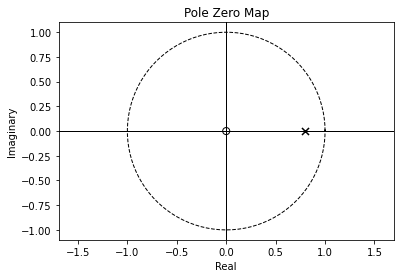

In [14]:
%matplotlib inline
tf = control.tf([1,0],[1,-0.8],1)
control.pzmap(tf,plot=True);plt.plot(np.cos(np.linspace(0,2*3.15,100)), np.sin(np.linspace(0,2*3.15,100)), 'k--', linewidth=1);plt.show()

Como o sistema é estável e a ROC inclui a circunferência unitária, podemos analisar a resposta em frequência:

$H(z)\Bigr\rvert_{z=e^{j\Omega}}=H(e^{j\Omega})$

$H(e^{j\Omega})=\frac{z}{z-0,8}\Bigr\rvert_{z=e^{j\Omega}}$

$H(e^{j\Omega})=\frac{e^{j\Omega}}{e^{j\Omega}-0,8}$

$H(e^{j\Omega})=\frac{||e^{j\Omega}||\angle{\Omega}}{||e^{j\Omega}-0,8||\angle tan^{-1}(\frac{sen(\Omega)}{cos(\Omega)-0,8})}$

$A(\Omega)=||H(e^{j\Omega})||=\frac{1}{\sqrt{(cos(\Omega)-0,8)^2+sen(\Omega)^2}}$ e

$\phi(\Omega)=∠H(e^{j\Omega})=\Omega-tan^{-1}(\frac{sen(\Omega)}{cos(\Omega)-0,8})$

In [6]:
def plot_freqresp():
    w, H = signal.dfreqresp(([1, 0],[1, -0.8],1),w=np.linspace(-3*np.pi,3*np.pi,num=1000))
    fig = plt.figure(1,figsize=(4,3), dpi= 200); ax=plt.subplot(2,1,1); plt.grid('on'); ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    plt.plot(w, abs(H), "b"); plt.ylabel('$A(\Omega))$'); ax=plt.subplot(2,1,2); plt.grid('on')
    plt.plot(w, np.angle(H), "r"); ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    plt.ylabel('$\phi(\Omega)$'); plt.xlabel('$\Omega$'); sns.despine(); fig.tight_layout(); plt.show()

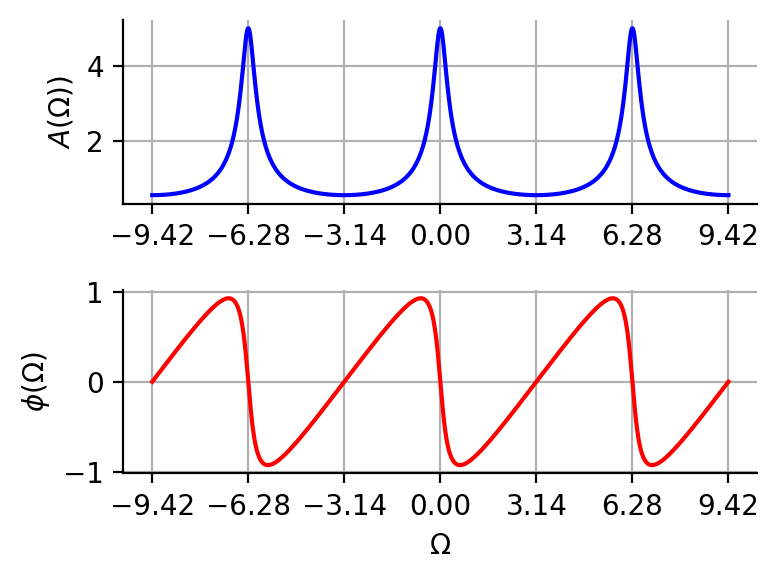

In [15]:
plot_freqresp()

Note que a resposta em frequência é periódica com período $2\pi$ pois $e^{j\Omega}$ tem período $2\pi$.

Quando aplicávamos nesse sistema uma entrada $x[n]=cos(\frac{2\pi}{T}n-0,2)$, ao aumentar o período $T$, estávamos dimiuindo a frequência $\Omega=2\pi/T$. Por isso que observávamos o aumento na amplitude e a fase se aproximando de zero.

Como um outro exemplo, analisemos a resposta em frequência de um sistema de atraso ideal:

$y[n]=x[n-m]$

Aplicando a transformada Z:

$H(z)=z^{-m}$

Essa função de transferência tem m polos em $z=0$ (supondo $m>0$). Como o sistema é causal, a ROC engloba a circunferência unitária. Fazendo $z=e^{j\Omega}$:

$H(e^{j\Omega})=e^{-j\Omega m}$

Logo: 

$A(\Omega)=||e^{-j\Omega m}||=1$ e

$\phi(\Omega)=∠H(e^{j\Omega})=0 -(\Omega m)=-\Omega m$

In [8]:
def plot_freqresp_ex2():
    w, H = signal.dfreqresp(([1],[1, 0, 0, 0],1),w=np.linspace(-np.pi,np.pi,num=1000))
    fig = plt.figure(1,figsize=(4,3), dpi= 200); ax=plt.subplot(2,1,1); plt.grid('on'); ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    plt.plot(w, abs(H), "b"); plt.ylabel('$A(\Omega)$'); ax=plt.subplot(2,1,2); plt.grid('on')
    plt.plot(w, np.angle(H), "r"); ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
    plt.ylabel('$\phi(\Omega)$'); plt.xlabel('$\Omega$'); sns.despine(); fig.tight_layout(); plt.show()

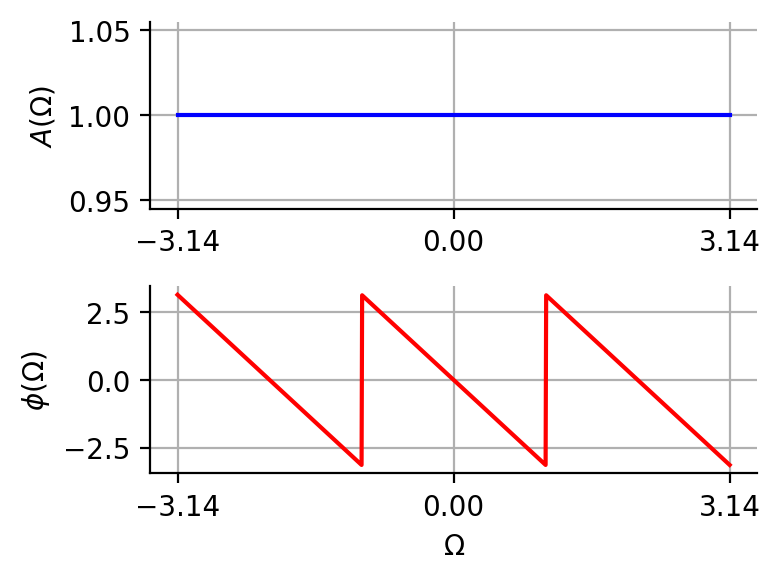

In [16]:
plot_freqresp_ex2()